In [1]:
#Importo las librerías necesarias para modelar la Máquina de vector de soporte
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  
from datetime import datetime
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt

In [2]:
#Cargo el Vector de entrenamiento en un dataframe
df = pd.read_csv("Tv.csv")
Training = df
Training

,x1,x2,x3,x4,x5,x6,x7,y
0,-0.015637,0.000393,0.001141,0.001948,0.001923,2.6,2.6,2.6
1,0.004350,0.002341,0.001144,-0.013863,0.001540,1.8,1.8,1.8
2,0.009650,-0.001169,0.002329,-0.011194,0.001150,1.8,1.7,1.7
3,0.019663,0.000782,0.002322,-0.017689,0.000383,2.4,2.4,2.4
4,0.020841,-0.015637,0.000393,0.001948,0.001923,1.9,1.9,1.9
...,...,...,...,...,...,...,...,...
1731,0.000782,0.002280,0.000376,0.002322,0.000383,4.2,3.6,3.6
1732,0.000393,0.001948,0.001141,0.001132,0.001923,3.6,3.6,3.6
1733,-0.013863,0.002341,0.001144,0.001887,0.001540,7.1,7.1,7.1
1734,-0.011194,-0.001169,0.002329,0.001150,0.002274,7.1,3.5,3.5


In [3]:
#Separo los valores de y del dataframe y creo la condición donde todos los eventos registrados mayores o iguales a 5 Mw
#Sean iguales a 1 y los demás iguales a 0 finalmente almanceno todo en un arreglo de numpy.
arregloy=Training[Training.columns[-1]].to_numpy()
y=[]
for i in range(len(arregloy)):
    if arregloy[i] >= 5.0:
        a=1
        y.append(a)
    else:
        a=0
        y.append(a)
print(y)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [4]:
#Separo los valores de x del dataframe y los convierto a un arreglo numérico con numpy
arreglox=Training[Training.columns[:-1]].to_numpy()
print(arreglox)
print(arreglox.shape)

[[-1.5637e-02  3.9300e-04  1.1410e-03 ...  1.9230e-03  2.6000e+00
   2.6000e+00]
 [ 4.3500e-03  2.3410e-03  1.1440e-03 ...  1.5400e-03  1.8000e+00
   1.8000e+00]
 [ 9.6500e-03 -1.1690e-03  2.3290e-03 ...  1.1500e-03  1.8000e+00
   1.7000e+00]
 ...
 [-1.3863e-02  2.3410e-03  1.1440e-03 ...  1.5400e-03  7.1000e+00
   7.1000e+00]
 [-1.1194e-02 -1.1690e-03  2.3290e-03 ...  2.2740e-03  7.1000e+00
   3.5000e+00]
 [-1.7689e-02  7.8200e-04  2.2800e-03 ...  3.8300e-04  4.8000e+00
   4.8000e+00]]
(1736, 7)


In [5]:
#Revisamos si hay valores NaN
sum(~np.isnan(arreglox))

array([1736, 1736, 1736, 1736, 1736, 1736, 1736])

# Configuración y entrenamiento del modelo original

In [7]:
#Configuramos todos los parámetros necesarios para ejecutar la Máquina de Vector de Soporte según el modelo a seguir.
instanteInicial = datetime.now() 
while True:
#Dividimos el array en 70/30 para entrenamiento y evaluación respectivamente.
    X_train, X_test, y_train, y_test = train_test_split(arreglox,y,test_size=0.30)
#Preprocesamos los datos para poder entrenar la SVM.
    scaler = StandardScaler()  
    scaler.fit(X_train)  
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
#Configuramos los parámetro de la SVM
    model=SVC(kernel='poly', gamma='scale', C=1.0, random_state=42)
#Entrenamos el modelo
    model.fit(X_train,y_train)
    print(model.score(X_train,y_train))
#Creamos una condición para que se ejecute el modelo hasta que se logre el score seleccionado
    if model.score(X_test,y_test) > 0.99996:
        instanteFinal = datetime.now() 
        tiempo = instanteFinal - instanteInicial 
        microsegundos = tiempo.microseconds
        print('tiempo de ejecución:', microsegundos)
        break


1.0
tiempo de ejecución: 3992


In [8]:
#Evaluamos el modelo con los datos de evaluación.
y_predic= model.predict(X_test)
#Ejecutamos los scores y los errores de la SVM
#Matríz de confusión
print(confusion_matrix(y_test,y_predic))
#Reporte de clasificación
print(classification_report(y_test,y_predic))
#Medida de precisión
print('AC =',accuracy_score(y_test,y_predic))
#Puntaje F o medida de precisión y exhaustividad 
print("F1 Score: "+ str(f1_score(y_test, y_predic, average='macro')))
print("F1 Score: "+ str(f1_score(y_test, y_predic, average='micro')))
print("F1 Score: "+ str(f1_score(y_test, y_predic, average='weighted')))

[[521]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       521

    accuracy                           1.00       521
   macro avg       1.00      1.00      1.00       521
weighted avg       1.00      1.00      1.00       521

AC = 1.0
F1 Score: 1.0
F1 Score: 1.0
F1 Score: 1.0


[0. 1.] [nan nan] [1 0]


C:\Users\yesid\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:811: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


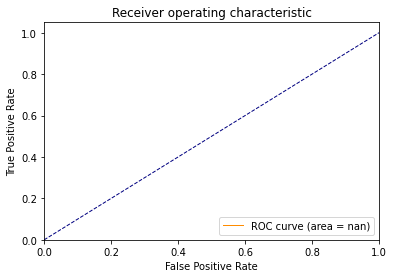

In [9]:
#Graficamos la predicción contra la evaluación
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predic)
roc_auc = auc(fpr, tpr)
print(fpr,tpr,thresholds)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of ticklabels (2).

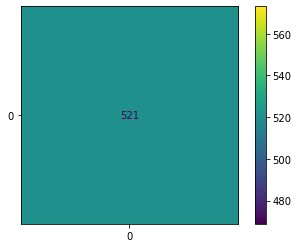

In [10]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import plot_confusion_matrix
#svc_disp = plot_roc_curve(model, X_test, y_test)
plot_confusion_matrix(model, X_test, y_test)  
plt.show()  

# Probando con el kernel: rbf (radial basis function)

In [11]:
#Configuramos todos los parámetros necesarios para ejecutar la Máquina de Vector de Soporte según el modelo a seguir.
instanteInicial = datetime.now() 
while True:
#Dividimos el array en 70/30 para entrenamiento y evaluación respectivamente.
    X_train, X_test, y_train, y_test = train_test_split(arreglox,y,test_size=0.30)
#Preprocesamos los datos para poder entrenar la SVM.
    scaler = StandardScaler()  
    scaler.fit(X_train)  
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
#Configuramos los parámetro de la SVM
    model2=SVC(kernel='linear', gamma='scale', C=1.0, random_state=42)
#Entrenamos el modelo
    model2.fit(X_train,y_train)
    print(model2.score(X_train,y_train))
#Creamos una condición para que se ejecute el modelo hasta que se logre el score seleccionado
    if model2.score(X_test,y_test) > 0.99996:
        instanteFinal = datetime.now() 
        tiempo = instanteFinal - instanteInicial 
        microsegundos = tiempo.microseconds
        print('tiempo de ejecución:', microsegundos)
        break


1.0
tiempo de ejecución: 3947


In [12]:
#Evaluamos el modelo con los datos de evaluación.
y_predic= model2.predict(X_test)
#Ejecutamos los scores y los errores de la SVM
#Matríz de confusión
print(confusion_matrix(y_test,y_predic))
#Reporte de clasificación
print(classification_report(y_test,y_predic))
#Medida de precisión
print('AC =',accuracy_score(y_test,y_predic))
#Puntaje F o medida de precisión y exhaustividad 
print("F1 Score: "+ str(f1_score(y_test, y_predic, average='macro')))
print("F1 Score: "+ str(f1_score(y_test, y_predic, average='micro')))
print("F1 Score: "+ str(f1_score(y_test, y_predic, average='weighted')))

[[521]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       521

    accuracy                           1.00       521
   macro avg       1.00      1.00      1.00       521
weighted avg       1.00      1.00      1.00       521

AC = 1.0
F1 Score: 1.0
F1 Score: 1.0
F1 Score: 1.0


# Probando con el kernel: sigmoide

In [55]:
#Configuramos todos los parámetros necesarios para ejecutar la Máquina de Vector de Soporte según el modelo a seguir.
instanteInicial = datetime.now() 
while True:
#Dividimos el array en 70/30 para entrenamiento y evaluación respectivamente.
    X_train, X_test, y_train, y_test = train_test_split(arreglox,y,test_size=0.30)

#Configuramos los parámetro de la SVM
    model3=SVC(kernel='sigmoid', gamma='scale', C=1.0, random_state=42)
#Entrenamos el modelo
    model3.fit(X_train,y_train)
    print(model3.score(X_train,y_train))
#Creamos una condición para que se ejecute el modelo hasta que se logre el score seleccionado
    if model3.score(X_test,y_test) > 0.99996:
        instanteFinal = datetime.now() 
        tiempo = instanteFinal - instanteInicial 
        microsegundos = tiempo.microseconds
        print('tiempo de ejecución:', microsegundos)
        break


0.9991769547325103
tiempo de ejecución: 4001


In [56]:
#Evaluamos el modelo con los datos de evaluación.
y_predic= model3.predict(X_test)
#Ejecutamos los scores y los errores de la SVM
#Matríz de confusión
print(confusion_matrix(y_test,y_predic))
#Reporte de clasificación
print(classification_report(y_test,y_predic))
#Medida de precisión
print('AC =',accuracy_score(y_test,y_predic))
#Puntaje F o medida de precisión y exhaustividad 
print("F1 Score: "+ str(f1_score(y_test, y_predic, average='macro')))
print("F1 Score: "+ str(f1_score(y_test, y_predic, average='micro')))
print("F1 Score: "+ str(f1_score(y_test, y_predic, average='weighted')))

[[521]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       521

    accuracy                           1.00       521
   macro avg       1.00      1.00      1.00       521
weighted avg       1.00      1.00      1.00       521

AC = 1.0
F1 Score: 1.0
F1 Score: 1.0
F1 Score: 1.0
